In [10]:
# %load_ext autoreload 
# %autoreload 2


from liftout import utils
from liftout.fibsem import movement, acquire
from liftout.fibsem import utils as fibsem_utils
import numpy as np
from pprint import pprint



from autoscript_sdb_microscope_client.structures import StagePosition

microscope = fibsem_utils.initialise_fibsem(ip_address="10.0.0.1")

settings = utils.load_config(r"C:\Users\Admin\Github\autoliftout\liftout\protocol_liftout.yml")
microscope = fibsem_utils.initialise_fibsem(ip_address=settings["system"]["ip_address"])
image_settings = acquire.ImageSettings(
    resolution=settings["imaging"]["resolution"],
    dwell_time=settings["imaging"]["dwell_time"],
    hfw=settings["imaging"]["horizontal_field_width"],
    autocontrast=True,
    beam_type=acquire.BeamType.ION,
    gamma=acquire.GammaSettings(
        enabled=settings["gamma"]["correction"],
        min_gamma=settings["gamma"]["min_gamma"],
        max_gamma=settings["gamma"]["max_gamma"],
        scale_factor=settings["gamma"]["scale_factor"],
        threshold=settings["gamma"]["threshold"]
    ),
    save=False,
    label="test",
)





Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]
Client connecting to [10.0.0.1:7520]...
Client connected to [10.0.0.1:7520]


In [11]:
scan_rotation = microscope.beams.ion_beam.scanning.rotation.value
stage_position = microscope.specimen.stage.current_position

pprint(f"scan rotation: {scan_rotation}")
pprint(f"stage_position {stage_position}")


pprint(image_settings)

'scan rotation: 0.0'
('stage_position StagePosition(x=0.009349625, y=0.008165875, z=0.0038257254, '
 't=-7.80505e-07, r=-2.2687056, coordinate_system=Specimen)')
ImageSettings(resolution='1536x1024', dwell_time=1e-06, hfw=0.00015, autocontrast=True, beam_type=<BeamType.ION: 2>, save=False, label='test', gamma=GammaSettings(enabled=1.0, min_gamma=0.15, max_gamma=1.8, scale_factor=0.01, threshold=46.0), save_path=None)


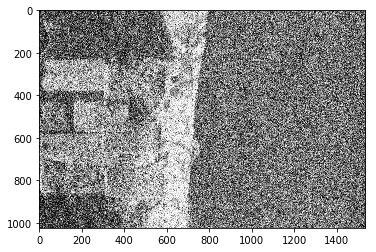

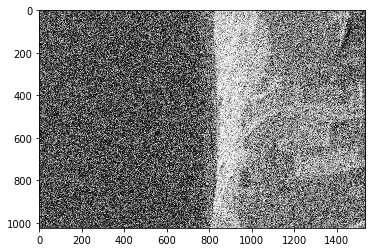

In [20]:
eb_image, ib_image = acquire.take_reference_images(microscope, image_settings)

import matplotlib.pyplot as plt

plt.imshow(eb_image.data, cmap="gray")
plt.show()

plt.imshow(ib_image.data, cmap="gray")
plt.show()

In [14]:
microscope.beams.ion_beam.scanning.rotation.value = np.deg2rad(180)

In [19]:
relative_move = StagePosition(y=-20.e-6)
scan_rotation = microscope.beams.ion_beam.scanning.rotation.value
stage_position = microscope.specimen.stage.current_position

pprint(f"scan rotation: {scan_rotation}")
pprint(f"initial_stage_position {stage_position}")
pprint(f"x_move: {relative_move}")

microscope.specimen.stage.relative_move(relative_move)

print("-" * 50)

stage_position = microscope.specimen.stage.current_position
pprint(f"scan rotation: {scan_rotation}")
pprint(f"initial_stage_position {stage_position}")


'scan rotation: 3.141592653589793'
('initial_stage_position StagePosition(x=0.0093997083, y=0.008165875, '
 'z=0.0038251145, t=-7.80505e-07, r=-2.2687056, coordinate_system=Specimen)')
'x_move: StagePosition(y=-2e-05)'
--------------------------------------------------
'scan rotation: 3.141592653589793'
('initial_stage_position StagePosition(x=0.0093997083, y=0.0081457917, '
 'z=0.0038251145, t=-7.80505e-07, r=-2.2687056, coordinate_system=Specimen)')
